In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [6]:
data = pd.read_csv('~/data/car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB
None


We can convert the string categorical values into integer codes using factorize method of the pandas library.

In [8]:
data['class'],class_names = pd.factorize(data['class'])

In [9]:
print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [10]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


Select predictor, target variables

In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(y.unique())

[0 1 2 3]


Data Preprocessing - apply PCA and choose fewer features

In [13]:
X = StandardScaler().fit_transform(X)


pca = PCA(n_components=3)

new_features = pca.fit_transform(X)
new_dataset = pd.DataFrame(data = new_features,
              columns = ['Principal component 1', 'Principal component 2', 'Principal component 3'])

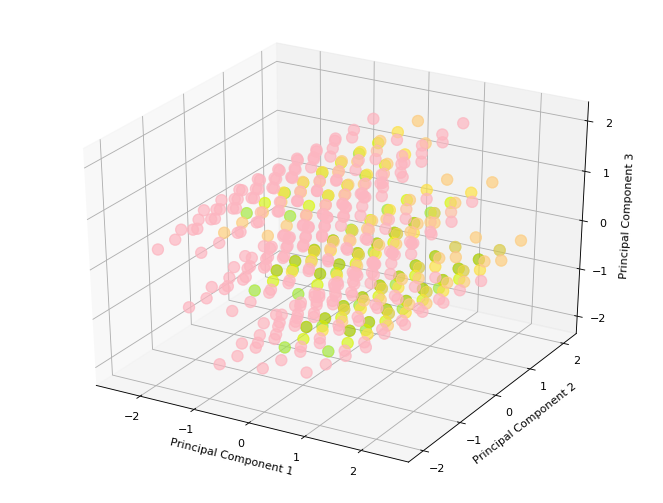

In [14]:
#fig = plt.figure()
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = Axes3D(fig)

targets = [0, 1, 2, 3]
colors = ['lightpink', 'yellow', 'darkgreen', 'c']
markers = ['o', 'o', 'o', 'o']
for target, color, marker in zip(targets,colors, markers):
    indices_target = y == target
    xs = new_dataset.loc[indices_target, 'Principal component 1']
    ys = new_dataset.loc[indices_target, 'Principal component 2']
    zs = new_dataset.loc[indices_target, 'Principal component 3']
    ax.scatter(xs, ys, zs, c=color, marker=marker, s = 100, alpha = 0.25)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
#ax.set_title('3 component PCA', fontsize = 20)

plt.show()

In [64]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [65]:
k_list = [0]*25
acc_list = [0]*25
for K in range(25):
    k_value = K+1
    model = KNeighborsClassifier(n_neighbors = k_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_list[K] = k_value
    acc_list[K] = accuracy
    print("Accuracy is: {:.2f} for k-value: {:.2f}".format(accuracy, k_value))

Accuracy is: 0.87 for k-value: 1.00
Accuracy is: 0.89 for k-value: 2.00
Accuracy is: 0.94 for k-value: 3.00
Accuracy is: 0.93 for k-value: 4.00
Accuracy is: 0.96 for k-value: 5.00
Accuracy is: 0.94 for k-value: 6.00
Accuracy is: 0.95 for k-value: 7.00
Accuracy is: 0.94 for k-value: 8.00
Accuracy is: 0.94 for k-value: 9.00
Accuracy is: 0.94 for k-value: 10.00
Accuracy is: 0.94 for k-value: 11.00
Accuracy is: 0.93 for k-value: 12.00
Accuracy is: 0.94 for k-value: 13.00
Accuracy is: 0.94 for k-value: 14.00
Accuracy is: 0.94 for k-value: 15.00
Accuracy is: 0.93 for k-value: 16.00
Accuracy is: 0.94 for k-value: 17.00
Accuracy is: 0.92 for k-value: 18.00
Accuracy is: 0.92 for k-value: 19.00
Accuracy is: 0.92 for k-value: 20.00
Accuracy is: 0.92 for k-value: 21.00
Accuracy is: 0.93 for k-value: 22.00
Accuracy is: 0.92 for k-value: 23.00
Accuracy is: 0.92 for k-value: 24.00
Accuracy is: 0.92 for k-value: 25.00


Text(0,0.5,'Accuracy')

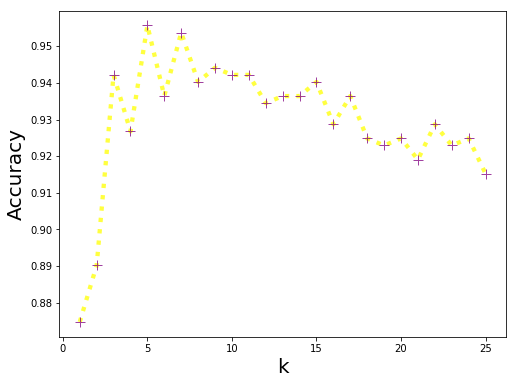

In [66]:
plt.figure(num=None, figsize=(8, 6))
plt.plot(k_list,acc_list, color = 'yellow', alpha = 0.75, ls = 'dotted', lw = 4.3, marker = '+', ms = 10, mec = 'purple')
plt.xlabel('k', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)

In [67]:
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 44
Accuracy: 0.92
